In [7]:
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [8]:
from pandas import DataFrame as df # type: ignore

In [9]:
data = pd.read_csv('./lsd_math_score_data.csv')

In [10]:
data

,Time_Delay_in_Minutes,LSD_ppm,Avg_Math_Test_Score
0,5,1.17,78.93
1,15,2.97,58.20
2,30,3.26,67.47
3,60,4.69,37.47
4,120,5.83,45.65
5,240,6.00,32.92
6,480,6.41,29.97


In [11]:
# SEPARATING THE DATA INTO INDIVIDUAL SERIES 
time = data.Time_Delay_in_Minutes
LSD = data['LSD_ppm']
score = data['Avg_Math_Test_Score']

In [12]:
# GENERATING GRAPHICAL REPRESENTATIONS 
%matplotlib inline
def make_a_plot(data_1, data_2, title, xlabel, ylabel):
    plt.plot(data_1, data_2, color="cornflowerblue")
    plt.title(title, fontsize=14)
    plt.xlabel(xlabel, fontsize=10)
    plt.ylabel(ylabel, fontsize=10)
    plt.text(x=0, y=-0.3, s="Wagner et. al (2012)", fontsize=12)
#     scales on the graph
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
#     plt.style.use('ggplot')
    plt.style.use("fivethirtyeight")

    
#     Range of values on the axis 
    plt.ylim(1, 7)
    plt.xlim(1, 400)
    
    
    plt.show()

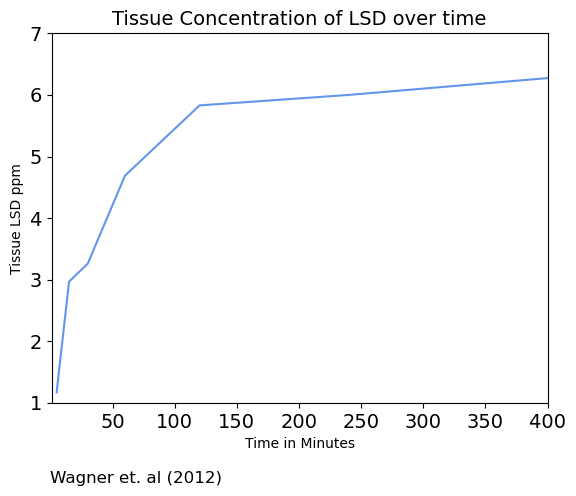

In [13]:
# Plot of time against drug concentration and tissue.
make_a_plot(
    time, 
    LSD,
    title="Tissue Concentration of LSD over time",
    xlabel="Time in Minutes",
    ylabel="Tissue LSD ppm"
)

BUILDING THE MODEL 

In [14]:
# SEPARATING THE DATA INTO INDIVIDUAL DATAFRAMES 
df_time = data[['Time_Delay_in_Minutes']]
df_LSD = data[['LSD_ppm']]
df_score = data[['Avg_Math_Test_Score']]

In [15]:
from sklearn.linear_model import LinearRegression # type: ignore

In [16]:
regress = LinearRegression()
regress.fit(df_LSD, df_score)

LinearRegression()

In [21]:
coefficient = regress.coef_[0][0]
intercept_ = regress.intercept_[0]
# Goodness of fit or R-Square percentage of the data explained by the amount of drugs in the LSD or Volunteer Tissue  
r_square = regress.score(df_LSD, df_score)
round_r_square = round(r_square, 2) * 100
predicted_scores = regress.predict(df_LSD)
print("=========== details of the analysis or model ============== \n")
print("Theta! ", coefficient)
print("intercept: ", intercept_)
print("R-Square or Goodness of fit: ", round(r_square, 2))
print(f"The amount of drugs in the tester tissue explains {round_r_square}% of the math test performance.")
print(f"Prediction \n ${predicted_scores}\n")

print(f"model_eqn(score) = {coefficient}x + {intercept_}")

=========== details of the analysis or model ============== 

Theta!  -9.009466415296785
intercept:  89.12387376799308
R-Square or Goodness of fit:  0.88
The amount of drugs in the tester tissue explains 88.0% of the math test performance.
Prediction 
 $[[78.58279806]
 [62.36575851]
 [59.75301325]
 [46.86947628]
 [36.59868457]
 [35.06707528]
 [31.37319405]]

model_eqn(score) = -9.009466415296785x + 89.12387376799308


Text(0, 0.5, 'Performance Score')

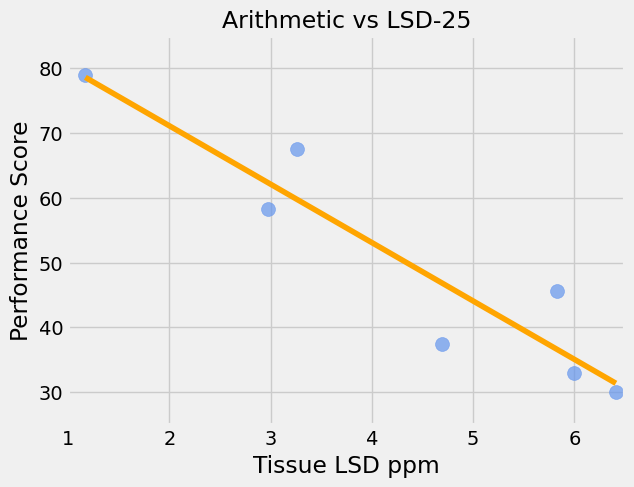

In [18]:
# Scatter plot 
%matplotlib inline
plt.scatter(df_LSD, df_score, color="cornflowerblue", s=100,  alpha=0.7)
plt.plot(df_LSD, predicted_scores, color="orange")

plt.title("Arithmetic vs LSD-25", fontsize=17)
plt.xlabel("Tissue LSD ppm")
plt.ylim(25, 85)
plt.xlim(1, 6.5)
plt.style.use("fivethirtyeight")
plt.ylabel("Performance Score")

<h2>This explains that as the tissue LSD increases the performance score of the individual decreases hence drugs are bad for taking math test per this model.</h2>